# PyCaret implementation

In [23]:
from unidecode import unidecode
import pandas as pd

In [24]:
df = pd.read_csv(r"..\CSVs\EditedDataSet_dfShort-cap.csv", encoding="utf-16")

In [25]:
for col in df:
    df.rename(columns = {col:unidecode(col)}, inplace = True)

In [26]:
data = df.sample(frac=0.8).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (609, 7)
Unseen Data For Predictions: (152, 7)


In [27]:
from pycaret.regression import *

exp_reg101 = setup(data = data, target = 'Pret') 

,Description,Value
0,Session id,7541
1,Target,Pret
2,Target type,Regression
3,Original data shape,"(609, 7)"
4,Transformed data shape,"(609, 7)"
5,Transformed train set shape,"(426, 7)"
6,Transformed test set shape,"(183, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [28]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,111661.6429,38922370784.1723,196184.6357,0.7288,0.3735,0.2822,0.0260
gbr,Gradient Boosting Regressor,131823.2335,39778277307.2128,198412.8952,0.7227,0.4075,0.3600,0.0120
rf,Random Forest Regressor,120801.7545,39458057779.0787,197308.0146,0.7224,0.3804,0.3029,0.0340
lightgbm,Light Gradient Boosting Machine,130659.0836,40935305828.9675,201873.8755,0.7101,0.4037,0.3346,0.0450
lasso,Lasso Regression,140462.0039,40785441382.4000,201428.8000,0.7090,0.4294,0.3749,0.0050
ridge,Ridge Regression,140449.5758,40783054848.0000,201423.5250,0.7090,0.4292,0.3748,0.0050
lar,Least Angle Regression,140462.1141,40785436876.8000,201428.7875,0.7090,0.4294,0.3749,0.0050
llar,Lasso Least Angle Regression,140462.0070,40785441996.8000,201428.8047,0.7090,0.4294,0.3749,0.0050
lr,Linear Regression,140462.0719,40785434419.2000,201428.7766,0.7090,0.4294,0.3749,0.0060
en,Elastic Net,140344.7594,40781430784.0000,201442.1594,0.7089,0.4233,0.3757,0.0050


ExtraTreesRegressor(n_jobs=-1, random_state=7541)

In [29]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,108253.5046,37205285785.3949,192886.7175,0.6677,0.4211,0.3398
1,120095.2007,34380805721.9293,185420.6184,0.7734,0.3908,0.3023
2,107346.0985,28254967472.8169,168092.1398,0.7432,0.4257,0.3181
3,114353.7689,47488794266.4798,217919.2379,0.6149,0.3550,0.2755
4,149766.5110,58236386996.9367,241322.1643,0.7499,0.3224,0.2379
5,116699.1670,36870708128.6462,192017.4683,0.7928,0.3819,0.3091
6,143103.3002,47533757178.0283,218022.3777,0.5497,0.4817,0.4348
7,107022.0695,32444935657.5542,180124.7780,0.7927,0.3394,0.2554
8,120577.9944,27659613845.1822,166311.7971,0.8006,0.3795,0.3179


In [30]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,95718.6388,33875977649.2233,184054.2791,0.6974,0.3918,0.2953
1,116672.0623,35468792645.3284,188331.6029,0.7662,0.3963,0.2872
2,94652.5302,28058386724.3678,167506.3782,0.7450,0.4134,0.3044
3,100400.3619,39669846684.6419,199172.9065,0.6783,0.3272,0.2349
4,133999.2981,58958846108.0764,242814.4273,0.7468,0.3334,0.2145
5,120754.0788,40874308758.2335,202173.9567,0.7704,0.3992,0.3213
6,133271.6798,45489330418.7474,213282.2787,0.5691,0.4628,0.4079
7,100283.0202,32220301224.9244,179500.1427,0.7941,0.3584,0.2680
8,113985.4095,31268870062.2189,176830.0598,0.7746,0.3686,0.2839


Tuning the model

In [31]:
tuned_rf = tune_model(rf)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,118234.6562,38433565794.2994,196044.8056,0.6567,0.4338,0.3838
1,120520.1695,29017570388.8970,170345.4443,0.8087,0.3603,0.3020
2,119799.3692,34897535769.4286,186808.8214,0.6829,0.4314,0.3726
3,112035.5938,39790509484.4898,199475.5862,0.6774,0.3434,0.2873
4,146203.4733,50741400803.2733,225258.5199,0.7821,0.3147,0.2597
5,140884.6649,46415214506.8068,215441.9052,0.7392,0.4074,0.3581
6,131408.1949,40743256481.3736,201849.5888,0.6140,0.4520,0.4011
7,115556.9291,31821464979.5370,178385.7197,0.7967,0.3577,0.3045
8,121968.3107,26823847565.3036,163779.8753,0.8067,0.3678,0.3300


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Plot model

In [32]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,109283.0519,34334575707.5856,185295.9139,0.6933,0.4114,0.3518
1,127103.4052,32691794346.9992,180808.7231,0.7845,0.3973,0.3272
2,100795.1663,26790097308.1426,163676.8075,0.7566,0.4103,0.3381
3,114961.8508,39832719392.5708,199581.3603,0.6770,0.3445,0.2947
4,150652.9944,54363136999.1500,233159.0380,0.7666,0.3206,0.2603
5,112144.7513,35126764038.4038,187421.3543,0.8026,0.3632,0.2922
6,140046.0007,48367544424.9817,219926.2250,0.5418,0.4888,0.4460
7,114600.5962,32989403057.7742,181629.8518,0.7892,0.3598,0.3019
8,132195.3954,34982217884.1394,187035.3386,0.7479,0.3934,0.3428


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


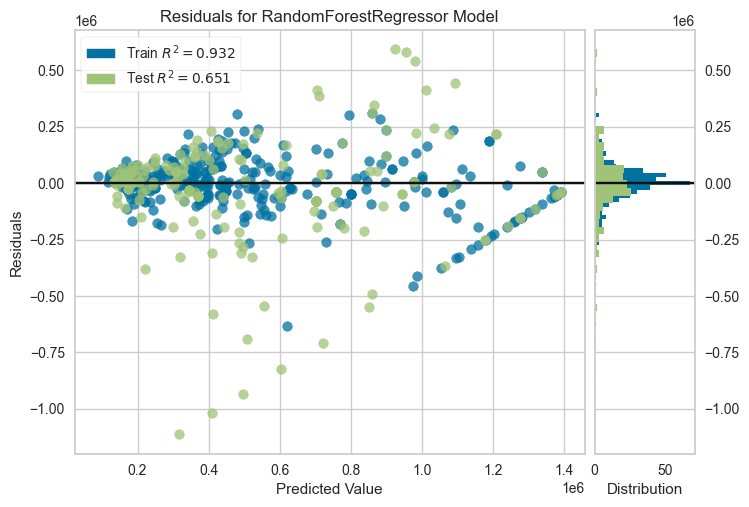

In [33]:
plot_model(tuned_rf)

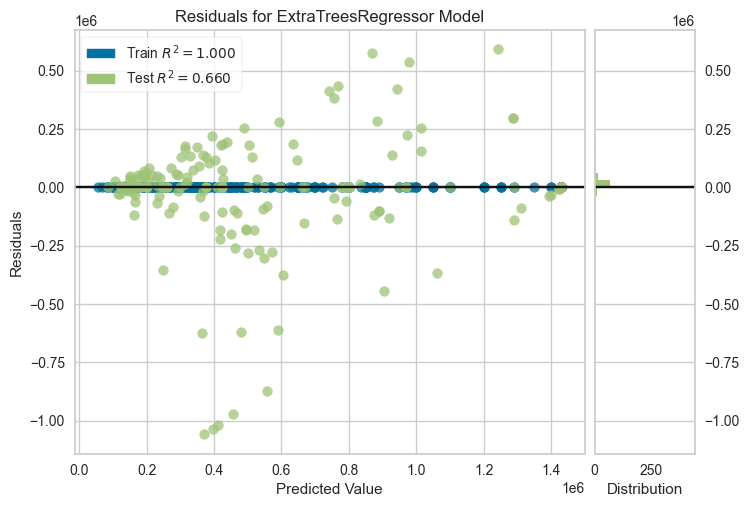

In [34]:
plot_model(tuned_et)

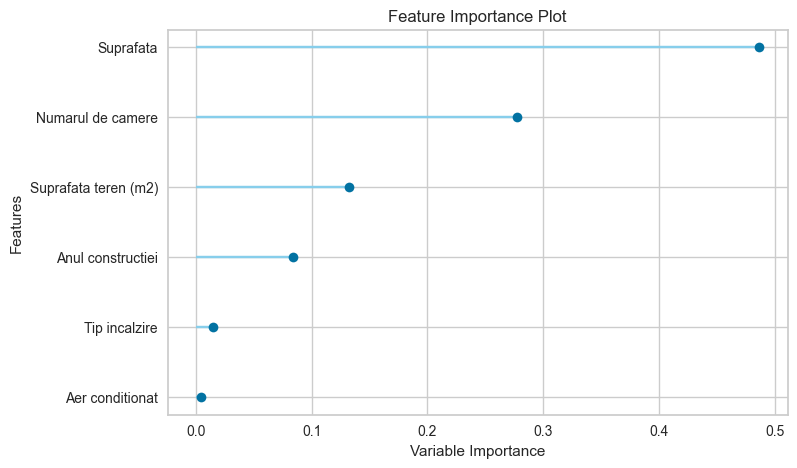

In [35]:
plot_model(tuned_rf, plot='feature')

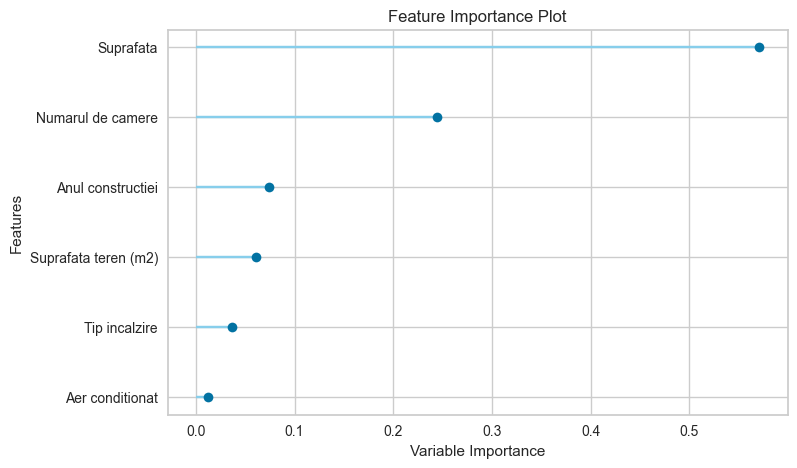

In [36]:
plot_model(tuned_et, plot="feature")

Prediction

In [37]:
predict_model(tuned_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,146837.6164,57434975701.1029,239655.9528,0.6514,0.3902,0.3009


,Suprafata,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
132,137.0,6,290.0,2020.0,4.0,0,180000.0,1.826581e+05
594,300.0,7,336.0,2022.0,5.0,0,499900.0,4.397589e+05
459,340.0,2,383.0,1970.0,10.0,0,820000.0,6.967704e+05
456,278.0,6,278.0,2009.0,5.0,1,240000.0,4.250348e+05
511,317.0,7,242.0,2009.0,7.0,1,800000.0,7.586659e+05
...,...,...,...,...,...,...,...,...
60,140.0,7,300.0,2022.0,4.0,0,159900.0,1.651832e+05
428,600.0,6,441.0,1910.0,9.0,1,1430000.0,1.391593e+06
496,335.0,6,20.0,2005.0,5.0,1,780000.0,7.027461e+05
478,657.5,7,541.0,1980.0,10.0,0,1430000.0,1.242239e+06


In [38]:
predict_model(tuned_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,125370.8768,56050024057.5587,236748.8628,0.6598,0.3810,0.2605


,Suprafata,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
132,137.0,6,290.0,2020.0,4.0,0,180000.0,180000.00
594,300.0,7,336.0,2022.0,5.0,0,499900.0,499900.00
459,340.0,2,383.0,1970.0,10.0,0,820000.0,667597.61
456,278.0,6,278.0,2009.0,5.0,1,240000.0,425898.90
511,317.0,7,242.0,2009.0,7.0,1,800000.0,800000.00
...,...,...,...,...,...,...,...,...
60,140.0,7,300.0,2022.0,4.0,0,159900.0,159900.00
428,600.0,6,441.0,1910.0,9.0,1,1430000.0,1430000.00
496,335.0,6,20.0,2005.0,5.0,1,780000.0,780000.00
478,657.5,7,541.0,1980.0,10.0,0,1430000.0,1288900.00


In [39]:
final_rf = finalize_model(tuned_rf)

In [40]:
final_et = finalize_model(tuned_et)

In [41]:
predict_model(final_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,77360.3335,15829333086.7108,125814.6775,0.9039,0.2243,0.1766


,Suprafata,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
132,137.0,6,290.0,2020.0,4.0,0,180000.0,1.697373e+05
594,300.0,7,336.0,2022.0,5.0,0,499900.0,4.932119e+05
459,340.0,2,383.0,1970.0,10.0,0,820000.0,8.881258e+05
456,278.0,6,278.0,2009.0,5.0,1,240000.0,3.019968e+05
511,317.0,7,242.0,2009.0,7.0,1,800000.0,7.717489e+05
...,...,...,...,...,...,...,...,...
60,140.0,7,300.0,2022.0,4.0,0,159900.0,1.604542e+05
428,600.0,6,441.0,1910.0,9.0,1,1430000.0,1.417019e+06
496,335.0,6,20.0,2005.0,5.0,1,780000.0,7.628599e+05
478,657.5,7,541.0,1980.0,10.0,0,1430000.0,1.341472e+06


In [42]:
predict_model(final_et)

,Suprafata,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
132,137.0,6,290.0,2020.0,4.0,0,180000.0,180000.0
594,300.0,7,336.0,2022.0,5.0,0,499900.0,499900.0
459,340.0,2,383.0,1970.0,10.0,0,820000.0,820000.0
456,278.0,6,278.0,2009.0,5.0,1,240000.0,240000.0
511,317.0,7,242.0,2009.0,7.0,1,800000.0,800000.0
...,...,...,...,...,...,...,...,...
60,140.0,7,300.0,2022.0,4.0,0,159900.0,159900.0
428,600.0,6,441.0,1910.0,9.0,1,1430000.0,1430000.0
496,335.0,6,20.0,2005.0,5.0,1,780000.0,780000.0
478,657.5,7,541.0,1980.0,10.0,0,1430000.0,1430000.0


In [43]:
unseen_predictions = predict_model(final_rf, data = data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,91637.4212,21700097854.3383,147309.5308,0.8072,0.3324,0.2936


,Suprafata,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
0,290.0,7,250.0,2009.0,8.0,0,249900.0,441554.726119
1,247.0,7,702.0,2022.0,5.0,0,390000.0,404092.692911
2,203.0,6,200.0,2023.0,5.0,0,375000.0,356299.712825
3,278.0,6,278.0,2009.0,5.0,1,240000.0,301996.785276
4,400.0,6,730.0,2008.0,9.0,0,325000.0,596015.260504


In [44]:
unseen_predictions = predict_model(final_et, data = data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,23595.9803,7372997637.3523,85866.1612,0.9345,0.1867,0.0736


,Suprafata,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
0,290.0,7,250.0,2009.0,8.0,0,249900.0,249900.0
1,247.0,7,702.0,2022.0,5.0,0,390000.0,390000.0
2,203.0,6,200.0,2023.0,5.0,0,375000.0,375000.0
3,278.0,6,278.0,2009.0,5.0,1,240000.0,240000.0
4,400.0,6,730.0,2008.0,9.0,0,325000.0,325000.0
